### Import necessary modules

In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple output cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Load dataset
movies_full = pd.read_csv("/Users/ankitadeshmukh/Desktop/SJSU/Academic/Fall22/CMPE257/Project/Dataset/serendipity-sac2018/movies.csv", on_bad_lines='skip')
movies_full.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
0,1,Toy Story (1995),19/11/95,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862.0,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),15/12/95,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844.0,"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),01/01/95,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602.0,"Comedy,Romance"
3,4,Waiting to Exhale (1995),15/01/96,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357.0,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),08/12/95,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862.0,Comedy


In [5]:
# Drop unnecessary columns
cols_to_drop = ['imdbId', 'tmdbId']
movies_full.drop(cols_to_drop, axis = 1, inplace = True)
movies_full.head()

,movieId,title,releaseDate,directedBy,starring,genres
0,1,Toy Story (1995),19/11/95,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...","Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),15/12/95,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...","Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),01/01/95,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...","Comedy,Romance"
3,4,Waiting to Exhale (1995),15/01/96,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...","Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),08/12/95,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",Comedy


In [6]:
# Find numerical colums
movies_full.select_dtypes(exclude=['object']).columns.tolist()
# Find categorical colums
movies_full.select_dtypes(include=['object']).columns.tolist()
# Check for missing values
movies_full.isnull().sum()
# Check for duplicate values
movies_full.duplicated().sum()

['movieId']

['title', 'releaseDate', 'directedBy', 'starring', 'genres']

movieId           0
title             2
releaseDate       0
directedBy     1462
starring       3547
genres         3312
dtype: int64

0

#### 1 numerical columns and 5 categorical columns

#### No duplicate observations but some missing values

In [7]:
# Since our dataset is large, removing the rows with missing values won't hurt.
movies_full.dropna(inplace=True)
# Check for missing values again
movies_full.isnull().sum()

movieId        0
title          0
releaseDate    0
directedBy     0
starring       0
genres         0
dtype: int64

In [8]:
# Find the dimensions of this dataset
movies_full.shape

(43018, 6)

### Now we have 43018 unique movies in our dataset with 6 features

### Let's use one-hot-encoding to find the movie genres

In [9]:
seperated_ratings = []

for col in movies_full["genres"]:
    try:
        col = col.split(",")
    except:
        col = ["Null"]
    seperated_ratings.append(col)

data = {'Seperated_genres': seperated_ratings}
test = pd.DataFrame(data)

one_hot = MultiLabelBinarizer()
res = one_hot.fit_transform(seperated_ratings)
classes = one_hot.classes_

df = pd.DataFrame(res, columns=classes)

movies_full = movies_full.drop('genres', axis=1)
movies_full = movies_full.join(df)
movies_full.head()

,movieId,title,releaseDate,directedBy,starring,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),19/11/95,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),15/12/95,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),01/01/95,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),15/01/96,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),08/12/95,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movies_full.shape

(43018, 24)

### Now we have additional 18 features comapred to previous data which means we have 18 movie genres.

In [11]:
movies_full.columns

Index(['movieId', 'title', 'releaseDate', 'directedBy', 'starring', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [12]:
movies_full.describe()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,43018.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000,38120.000000
mean,95162.104096,0.137644,0.081191,0.042156,0.050813,0.311647,0.103095,0.064690,0.479748,0.053017,0.009182,0.108237,0.004801,0.026495,0.054696,0.147770,0.068048,0.161149,0.037802,0.024161
std,59064.529850,0.344531,0.273132,0.200948,0.219619,0.463173,0.304088,0.245982,0.499596,0.224070,0.095381,0.310684,0.069121,0.160605,0.227388,0.354877,0.251832,0.367673,0.190719,0.153549
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43267.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,145537.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,183335.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Action    				5247
Adventure    				3095
Animation    				1607
Children    				1937
Comedy    				11880
Crime    				3930
Documentary    				2466
Drama    				18288
Fantasy    				2021
Film-Noir    				350
Horror    				4126
IMAX    				183
Musical    				1010
Mystery    				2085
Romance    				5633
Sci-Fi    				2594
Thriller    				6143
War    				1441


<BarContainer object of 18 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

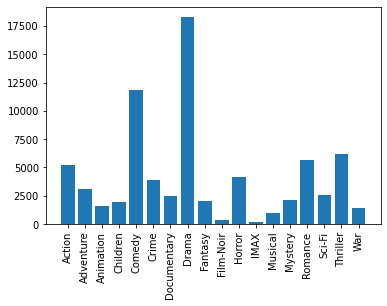

In [13]:
x={}
for i in movies_full.columns[5:23]:
    x[i]=movies_full[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))

plt.bar(height=x.values(),x=x.keys())
plt.xticks(rotation=90)
plt.show()

### Most of the movies from the dataset belong to Drama genre followed by Comedy.

In [3]:
# Load training dataset which contains the ratings for movies by different users
training_full = pd.read_csv("/Users/ankitadeshmukh/Desktop/SJSU/Academic/Fall22/CMPE257/Project/Dataset/serendipity-sac2018/training.csv")
training_full.head()

,userId,movieId,rating,timestamp
0,142882,91658,2.5,1515209647000
1,142882,4344,1.0,1515209646000
2,142882,45720,2.0,1515209643000
3,142882,4734,2.0,1515209641000
4,142882,91542,2.0,1515209637000


In [4]:
# Drop unnecessary columns
cols_to_drop = ['timestamp']
training_full.drop(cols_to_drop, axis = 1, inplace = True)
training_full.head()

,userId,movieId,rating
0,142882,91658,2.5
1,142882,4344,1.0
2,142882,45720,2.0
3,142882,4734,2.0
4,142882,91542,2.0


In [16]:
# Find numerical colums
training_full.select_dtypes(exclude=['object']).columns.tolist()
# Find categorical colums
training_full.select_dtypes(include=['object']).columns.tolist()
# Check for missing values
training_full.isnull().sum()
# Check for duplicate values
training_full.duplicated().sum()

['userId', 'movieId', 'rating']

[]

userId     0
movieId    0
rating     0
dtype: int64

0

In [5]:
training_full.shape

(9997850, 3)

#### 3 numerical columns and 0 categorical columns

#### No missing values and no duplicate observations

In [29]:
# Merge movies and training file based on movieId
movie_ratings_df = pd.merge(training_full, movies_full, on='movieId')
movie_ratings_df.head()

,userId,movieId,rating,title,releaseDate,directedBy,starring,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Extracting the year from the Title
movie_ratings_df['Year'] = movie_ratings_df['title'].str.extract('.*\((.*)\).*',expand = False)
movie_ratings_df.head()

,userId,movieId,rating,title,releaseDate,directedBy,starring,Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011


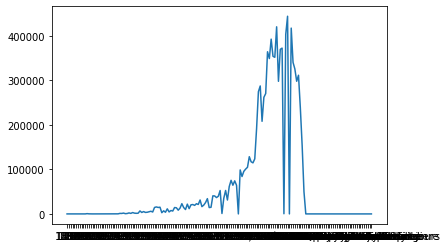

Max No.of Movies Relesed = 443747
Year = 2009


count       168.000000
mean      59120.642857
std      113861.704637
min           1.000000
25%           8.750000
50%        3557.000000
75%       40391.250000
max      443747.000000
Name: title, dtype: float64

In [31]:
#Ploting a Graph with number of Movies each Year corresponding to its Year
plt.plot(movie_ratings_df.groupby('Year').title.count())
plt.show()
a=movie_ratings_df.groupby('Year').title.count()
print('Max No.of Movies Relesed =',a.max())
for i in a.index:
    if a[i] == a.max():
        print('Year =',i)
a.describe()

### Now we know that the maximum number of movies were in 2009 with count = 443747. On an average, 59120 movies are released every year.

In [32]:
avg_rating_df = movie_ratings_df.groupby(['movieId']).agg (avg_rating = ('rating', 'mean'))
movie_ratings_df = pd.merge(movie_ratings_df, avg_rating_df, how='outer', on='movieId')
movie_ratings_df.head()

,userId,movieId,rating,title,releaseDate,directedBy,starring,Action,Adventure,Animation,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,avg_rating
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041


In [33]:
count_df = movie_ratings_df.groupby(['movieId']).agg (user_count = ('userId', 'count'))
movie_ratings_df = pd.merge(movie_ratings_df, count_df, how='outer', on='movieId')
movie_ratings_df.head()


,userId,movieId,rating,title,releaseDate,directedBy,starring,Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,avg_rating,user_count
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652
1,142911,91658,5.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652
2,142893,91658,3.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652
3,142884,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652
4,142322,91658,4.0,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652


In [38]:
new_df = movie_ratings_df[['userId', 'movieId', 'title', 'rating', 'avg_rating' ,'user_count']]
new_df.head()

,userId,movieId,title,rating,avg_rating,user_count
0,142882,91658,"Girl with the Dragon Tattoo, The (2011)",2.5,3.817041,7652
1,142911,91658,"Girl with the Dragon Tattoo, The (2011)",5.0,3.817041,7652
2,142893,91658,"Girl with the Dragon Tattoo, The (2011)",3.0,3.817041,7652
3,142884,91658,"Girl with the Dragon Tattoo, The (2011)",4.0,3.817041,7652
4,142322,91658,"Girl with the Dragon Tattoo, The (2011)",4.0,3.817041,7652


In [39]:
new_df.sort_values(['user_count', 'avg_rating'],ascending=False)

,userId,movieId,title,rating,avg_rating,user_count
2338286,142914,2571,"Matrix, The (1999)",3.5,4.107004,42120
2338287,142913,2571,"Matrix, The (1999)",4.5,4.107004,42120
2338288,142905,2571,"Matrix, The (1999)",2.0,4.107004,42120
2338289,142911,2571,"Matrix, The (1999)",4.0,4.107004,42120
2338290,142909,2571,"Matrix, The (1999)",4.0,4.107004,42120
...,...,...,...,...,...,...
9935277,154955,1561,Wedding Bell Blues (1996),0.5,0.500000,1
9935278,154955,1424,Inside (1996),0.5,0.500000,1
9935281,154955,8095,"Cucaracha, La (1998)",0.5,0.500000,1
9935282,154955,3541,Third World Cop (1999),0.5,0.500000,1


### Movies with the highest ratings

In [40]:
# selecting rows based on condition 
rslt_df = new_df.loc[new_df['avg_rating'] == 5.0].sort_values(['user_count'],ascending=False)
rslt_df

,userId,movieId,title,rating,avg_rating,user_count
9929785,102667,51571,Hazaaron Khwaishein Aisi,5.0,5.0,2
9908020,126685,166028,What Remains of Us (2004),5.0,5.0,2
9925813,114386,151569,The Old Fairy Tale: When the Sun Was God (2003),5.0,5.0,2
9928380,110773,144192,¡Cuba Sí! (1961),5.0,5.0,2
9886032,101983,140369,War Arrow (1954),5.0,5.0,2
...,...,...,...,...,...,...
9839502,137276,175727,Cure for Pain: The Mark Sandman Story (2011),5.0,5.0,1
9839501,137276,175729,Itinéraire bis (2011),5.0,5.0,1
9839500,137276,175731,The Box (2004),5.0,5.0,1
9839481,137276,175737,Ducoboo (2011),5.0,5.0,1


### Most of the movies which are rated 5 stars are only rated by 1 or 2 people.

### Top-10 most watched movies

In [41]:
rating_count = movie_ratings_df.groupby('title')['user_count']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:10]

title
Matrix, The (1999)                                           42120
Shawshank Redemption, The (1994)                             40889
Inception (2010)                                             37947
Dark Knight, The (2008)                                      34531
Fight Club (1999)                                            34290
Forrest Gump (1994)                                          33854
Lord of the Rings: The Return of the King, The (2003)        32509
Lord of the Rings: The Fellowship of the Ring, The (2001)    31634
Star Wars: Episode IV - A New Hope (1977)                    29141
Pulp Fiction (1994)                                          29140
Name: user_count, dtype: int64

### The most watched movie from our dataset is "The Matrix" with 42120 views. It is also the highest rated movie considering user ratings and viewer count.

### Let's find out how different users rated "The Matrix".

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'User rating of the movie “The Matrix”')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Number of Users')

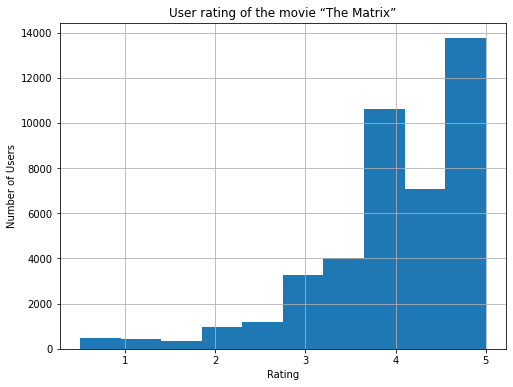

In [42]:
plt.figure(figsize=(8,6))
movies_grouped = movie_ratings_df.groupby('title')
the_matrix = movies_grouped.get_group('Matrix, The (1999)')
the_matrix['rating'].hist()
plt.title('User rating of the movie “The Matrix”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()

### Let's see which user voted for the most number of movies.

In [44]:
user_rating_df = movie_ratings_df.groupby(['userId']).agg (avg_user_rating = ('rating', 'mean'))
user_count_df = movie_ratings_df.groupby(['userId']).agg (avg_user_count = ('rating', 'count'))
user_ratings_df = pd.merge(movie_ratings_df, user_rating_df, how='outer', on='userId')
user_ratings_df = pd.merge(user_ratings_df, user_count_df, how='outer', on='userId')
user_ratings_df.head()

,userId,movieId,rating,title,releaseDate,directedBy,starring,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,Year,avg_rating,user_count,avg_user_rating,avg_user_count
0,142882,91658,2.5,"Girl with the Dragon Tattoo, The (2011)",21/12/11,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,3.817041,7652,2.598077,780
1,142882,4344,1.0,Swordfish (2001),08/06/01,Dominic Sena,"Hugh Jackman, John Travolta, Halle Berry, Don ...",0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2001,3.129220,2755,2.598077,780
2,142882,45720,2.0,"Devil Wears Prada, The (2006)",30/06/06,David Frankel,"Anne Hathaway, Meryl Streep, Adrian Grenier, S...",1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2006,3.491760,5704,2.598077,780
3,142882,4734,2.0,Jay and Silent Bob Strike Back (2001),24/08/01,Kevin Smith,"Jason Mewes, Kevin Smith, Ben Affleck, Jeff An...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2001,3.224567,2654,2.598077,780
4,142882,91542,2.0,Sherlock Holmes: A Game of Shadows (2011),16/12/11,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, N...",0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2011,3.739130,7866,2.598077,780


In [47]:
# new_user_df = user_ratings_df.drop(['rating', 'releaseDate', 'directedBy', 'starring', 'genres', 'Year', 'user_count'],axis = 1)
# new_user_df.sort_values(by = "avg_user_count", ascending=False).head(10)

new_user_df = user_ratings_df[['userId', 'movieId', 'title', 'rating', 'avg_rating', 'avg_user_rating','user_count', 'avg_user_count']]
new_user_df.sort_values(by = "avg_user_count", ascending=False).head(10)
new_user_df.head()


,userId,movieId,title,rating,avg_rating,avg_user_rating,user_count,avg_user_count
1382129,148071,110512,My Lady Margarine (Die Austernprinzessin) (Oys...,3.5,3.285714,3.166769,7,17923
1378006,148071,81660,1990: The Bronx Warriors (1990: I guerrieri de...,1.5,2.720000,3.166769,25,17923
1378016,148071,61941,Humboldt County (2008),2.0,3.318182,3.166769,33,17923
1378015,148071,5636,Welcome to Collinwood (2002),3.0,3.192308,3.166769,65,17923
1378014,148071,6410,Car Wash (1976),2.5,2.819444,3.166769,36,17923
1378013,148071,48159,Everyone's Hero (2006),2.5,2.975610,3.166769,41,17923
1378012,148071,54254,Come Early Morning (2006),2.5,3.192308,3.166769,13,17923
1378011,148071,55729,King of California (2007),3.0,3.339161,3.166769,143,17923
1378010,148071,61991,Miracle at St. Anna (2008),3.0,2.993056,3.166769,72,17923
1378009,148071,65045,Alien Raiders (2008),2.0,2.734043,3.166769,47,17923


,userId,movieId,title,rating,avg_rating,avg_user_rating,user_count,avg_user_count
0,142882,91658,"Girl with the Dragon Tattoo, The (2011)",2.5,3.817041,2.598077,7652,780
1,142882,4344,Swordfish (2001),1.0,3.129220,2.598077,2755,780
2,142882,45720,"Devil Wears Prada, The (2006)",2.0,3.491760,2.598077,5704,780
3,142882,4734,Jay and Silent Bob Strike Back (2001),2.0,3.224567,2.598077,2654,780
4,142882,91542,Sherlock Holmes: A Game of Shadows (2011),2.0,3.739130,2.598077,7866,780


### Top-10 users who voted the most number of movies

In [48]:
rating_count = new_user_df.groupby('userId')['avg_user_count']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:10]

userId
148071    17923
184994     7705
121660     5720
149977     5575
119645     5485
138634     4950
113476     4941
183041     4831
154364     4806
129944     4589
Name: avg_user_count, dtype: int64

### Rating pattern of User 148071 

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'User rating for different movies')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'No of movies rated bu User 148071')

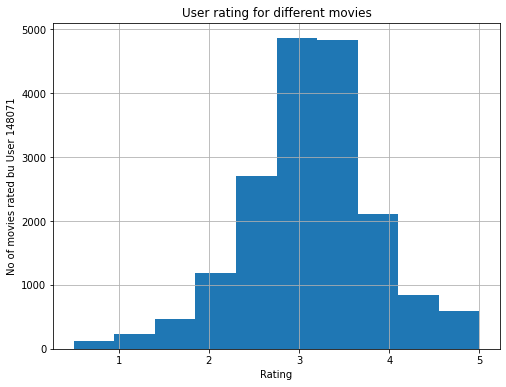

In [49]:
plt.figure(figsize=(8,6))
users_grouped = user_ratings_df.groupby('userId')
user_148071 = users_grouped.get_group(148071)
user_148071['rating'].hist()
plt.title('User rating for different movies')
plt.xlabel('Rating')
plt.ylabel('No of movies rated bu User 148071')

plt.show()

### There are other files like tags.csv, tag_genome.csv, answers.csv and we might use some of those files as metadata for content-based recommendations and latent-matrix factorization.